In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [271]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/spo2 vs r-r values/2000-3000.csv")

In [272]:
df.head(1000)

,SpO2,rrvalues
0,92.2855,0.670
1,92.2867,0.674
2,92.2872,0.679
3,92.2854,0.708
4,92.2860,0.728
...,...,...
995,90.2784,0.704
996,90.2790,0.707
997,90.2779,0.700
998,90.2788,0.717


In [273]:
df.describe()

,SpO2,rrvalues
count,1000.000000,1000.000000
mean,92.549455,0.760341
std,1.300670,0.045397
min,89.273100,0.641000
25%,92.284900,0.732000
50%,92.287450,0.757000
75%,93.290600,0.782000
max,96.999700,0.917000


In [274]:
df.shape

(1000, 2)

In [275]:
cdf = df[['SpO2','rrvalues']]
cdf.head(5)

,SpO2,rrvalues
0,92.2855,0.670
1,92.2867,0.674
2,92.2872,0.679
3,92.2854,0.708
4,92.2860,0.728


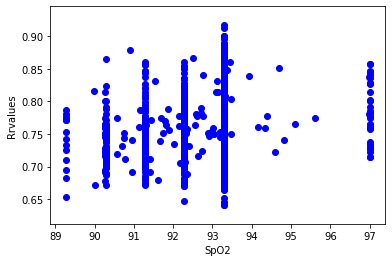

In [276]:
#graph of SNO vs r-r values

plt.scatter(cdf.SpO2, cdf.rrvalues,color='blue')
plt.xlabel('SpO2')
plt.ylabel('Rrvalues')
plt.show()

In [260]:
#splitting our data in 80-20 ratio for regression

In [277]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

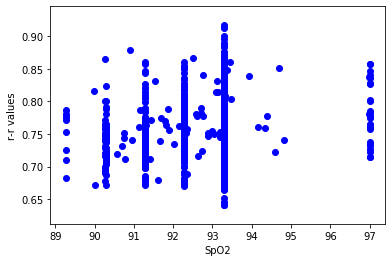

In [278]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
plt.xlabel("SpO2")
plt.ylabel("r-r values")
plt.show()

In [279]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00710012]]
Intercept:  [0.10308544]


Text(0, 0.5, 'r-r values')

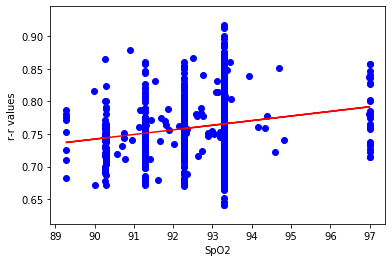

In [280]:
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SpO2")
plt.ylabel("r-r values")

In [281]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -21.87


In [282]:
#using polynomial regression

In [283]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 9.22867000e+01, 8.51683500e+03],
       [1.00000000e+00, 9.22872000e+01, 8.51692728e+03],
       [1.00000000e+00, 9.22854000e+01, 8.51659505e+03],
       ...,
       [1.00000000e+00, 9.02779000e+01, 8.15009923e+03],
       [1.00000000e+00, 9.02788000e+01, 8.15026173e+03],
       [1.00000000e+00, 9.02784000e+01, 8.15018951e+03]])

In [284]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.          0.11790912 -0.00059588]]
Intercept:  [-5.04728793]


Text(0, 0.5, 'r-rvalues')

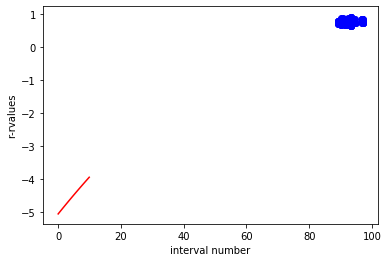

In [285]:
#plotting the polynomial regression
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [286]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -19.30
